# Workflow

In [1]:
#import the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
ins_data = pd.read_csv('insurance.csv')

In [6]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
ins_data.shape

(1338, 7)

In [8]:
#getting some information of data

In [9]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
#distribution of age value
import warnings
warnings.filterwarnings('ignore')

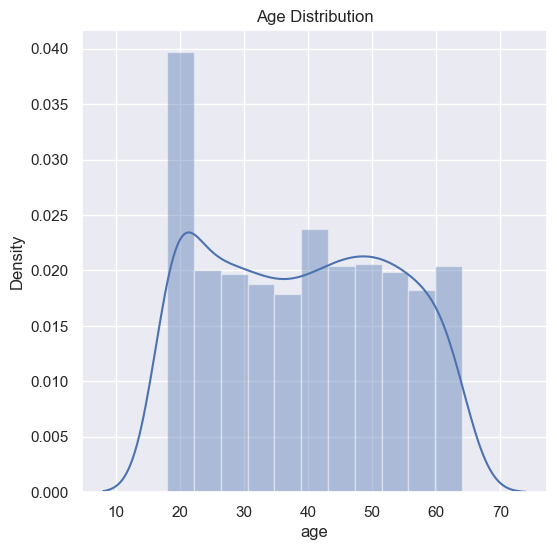

In [27]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(ins_data['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

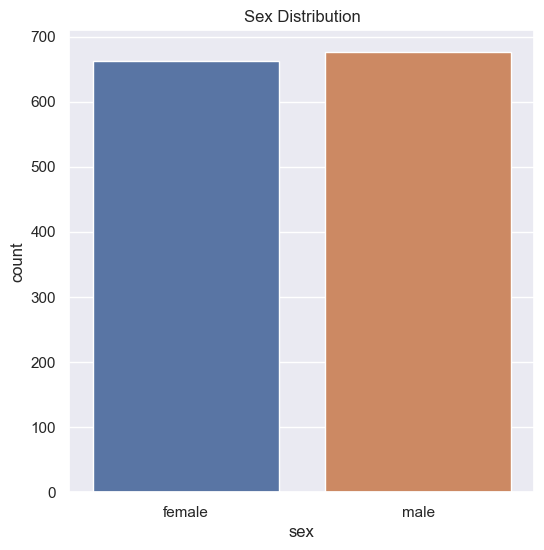

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=ins_data)
plt.title('Sex Distribution')

In [29]:
ins_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

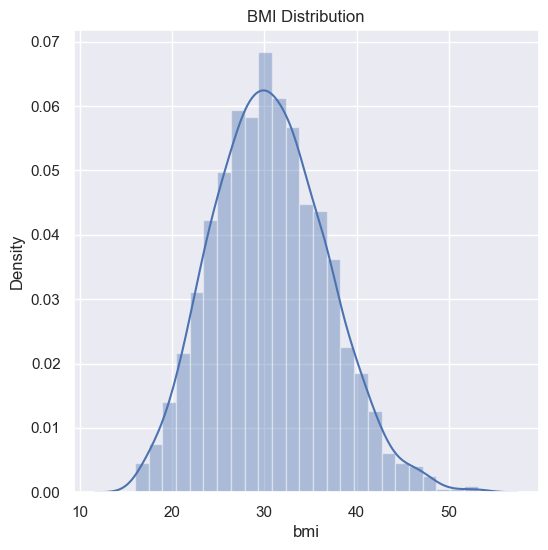

In [30]:
plt.figure(figsize=(6,6))
sns.distplot(ins_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal Bmi range - 18.5 to 24.9

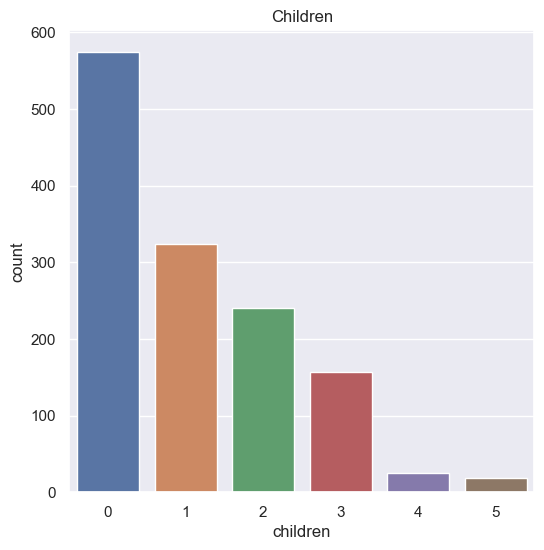

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=ins_data)
plt.title('Children')
plt.show()

In [32]:
ins_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

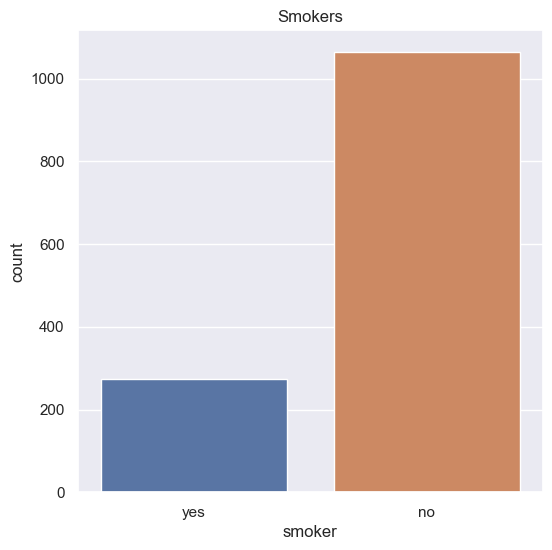

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=ins_data)
plt.title('Smokers')
plt.show()

In [34]:
ins_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

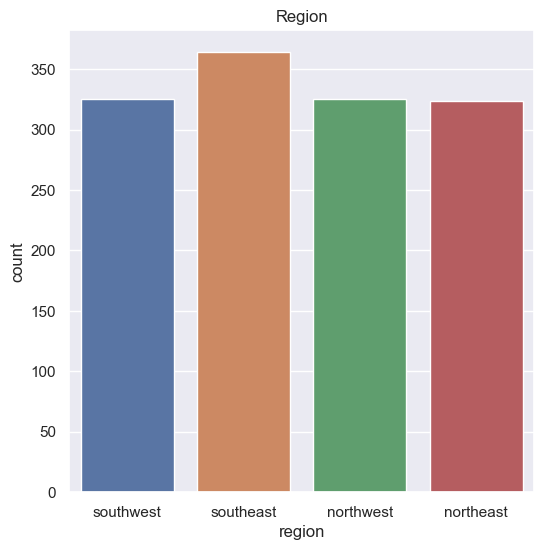

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=ins_data)
plt.title('Region')
plt.show()

In [36]:
ins_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

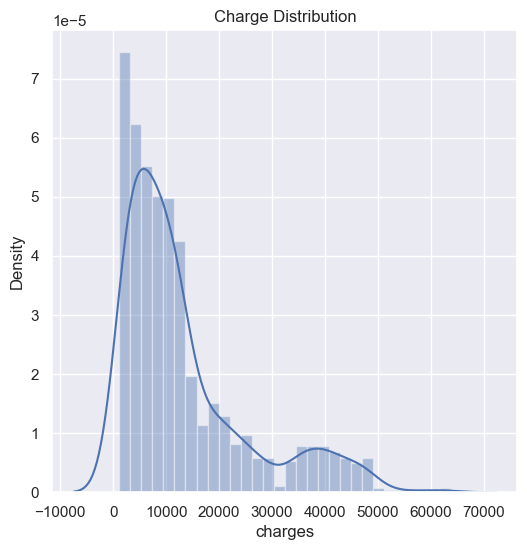

In [37]:
plt.figure(figsize=(6,6))
sns.distplot(ins_data['charges'])
plt.title('Charge Distribution')
plt.show()

# Data Preprocessing

In [38]:
#encoding the cstegorical feature
#encoding sex column

In [42]:
ins_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

ins_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

ins_data.replace({'region':{'southeast':0, 'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [43]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,3,1725.55230
2,28,0,33.000,3,1,3,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the Features and Target

In [45]:
X= ins_data.drop(columns='charges',axis=1)
Y = ins_data['charges']

In [46]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,3
2,28,0,33.000,3,1,3
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,3
1336,21,1,25.800,0,1,1


In [48]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [49]:
#splitting data to traning data and test data

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [51]:
print(X.shape,X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [52]:
model = LinearRegression()

In [54]:
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [55]:
#prediction on training data

training_data_pred = model.predict(X_train)

In [57]:
# r-squared value
r2_train= metrics.r2_score(Y_train, training_data_pred)
print('R squared value : ', r2_train)

R squared value :  0.7511968445000912


In [58]:
#prediction on test data

test_data_pred = model.predict(X_test)

In [60]:
# r-squared value
r2_test= metrics.r2_score(Y_test, test_data_pred)
print('R squared value : ', r2_test)

R squared value :  0.7426629382040212


Building the Predictive system

In [68]:
input_data = (62,1,26.29,0,0,0)

# Changing input data to a numoy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD',prediction[0])

[35750.09306632]
The insurance cost is USD 35750.09306631824
